# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [42]:
# Importando as dependências externas
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [43]:
# Carregando os dados
df_original = pd.read_csv('1.4_Regressao_Logistica_Binomial_Entrega_Dados.csv')
df_original.head(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0


In [44]:
# Avaliando o dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Obs: Na célula abaixo há um código para renomear as colunas.

In [45]:
# Criando uma cópia do dataset
df = df_original.copy()

In [46]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

In [47]:
df.corr()

,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online,fraude
dist_casa,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
dist_ultima_transacao,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
razao_preco_medio,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
loja_repetida,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
usou_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
usou_pin,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraude,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

In [48]:
# Como não há nenhuma correlação relevante, decidi utilizar todas as variáveis

## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

fraude
0.0    912597
1.0     87403
Name: count, dtype: int64

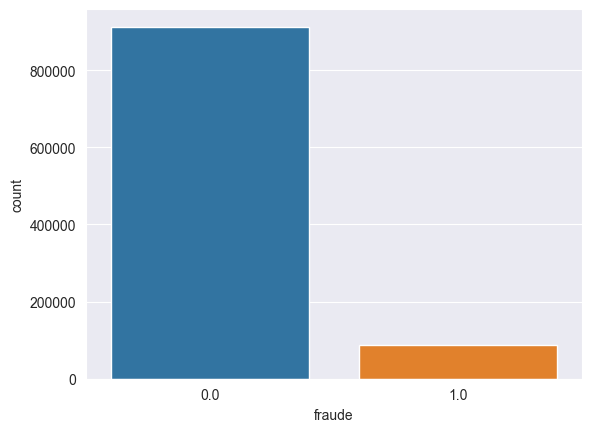

In [49]:
# Visualizando distribuição da variável fraude
sns.countplot(x='fraude', data=df)
df['fraude'].value_counts()

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [50]:
# separando as variáveis X e y
X = df.drop('fraude', axis=1)
y = df['fraude']

In [51]:
# balanceando as classes com undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [52]:
# Visualizando a nova distribuição da variável fraude
y.value_counts()

fraude
0.0    87403
1.0    87403
Name: count, dtype: int64

In [53]:
print(X)

         dist_casa  dist_ultima_transacao  razao_preco_medio  loja_repetida  \
273658    2.826782              22.077546           0.274759            1.0   
425704    4.967647               1.068489           3.964780            1.0   
248687    6.441749               0.109000           1.610864            1.0   
268368    6.462042               0.503219           0.583935            1.0   
986558   13.138909               0.195629           0.106529            1.0   
...            ...                    ...                ...            ...   
999908   45.296658               0.882736           8.856861            1.0   
999916  167.139756               0.282253           0.308468            1.0   
999919  124.640118               0.004416           0.434885            1.0   
999939   51.412900               3.429330          29.914254            1.0   
999949   15.724799               1.875906          11.009366            1.0   

        usou_chip  usou_pin  online  
273658       

## Atividade 4: Crie um modelo de regressão logística.

In [54]:
X = sm.add_constant(X)
print(X)

        const   dist_casa  dist_ultima_transacao  razao_preco_medio  \
273658    1.0    2.826782              22.077546           0.274759   
425704    1.0    4.967647               1.068489           3.964780   
248687    1.0    6.441749               0.109000           1.610864   
268368    1.0    6.462042               0.503219           0.583935   
986558    1.0   13.138909               0.195629           0.106529   
...       ...         ...                    ...                ...   
999908    1.0   45.296658               0.882736           8.856861   
999916    1.0  167.139756               0.282253           0.308468   
999919    1.0  124.640118               0.004416           0.434885   
999939    1.0   51.412900               3.429330          29.914254   
999949    1.0   15.724799               1.875906          11.009366   

        loja_repetida  usou_chip  usou_pin  online  
273658            1.0        1.0       0.0     1.0  
425704            1.0        1.0       0.

In [55]:
model = sm.Logit(y, X).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.216369
         Iterations 10


## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [56]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174798
Method:                           MLE   Df Model:                            7
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.6878
Time:                        12:34:57   Log-Likelihood:                -37823.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.5346      0.053   -142.640      0.000      -7.638      -7.431
dist_casa                 0.0278      0.000    129.314      0.000       0.027       0.028
dist_ult

In [57]:
# Convertendo os coeficientes em percentuais
coef = model.params
print(((np.exp(coef)-1)*100).round(2))

const                      -99.95
dist_casa                    2.82
dist_ultima_transacao        5.11
razao_preco_medio          227.19
loja_repetida              -73.94
usou_chip                  -69.80
usou_pin                  -100.00
online                   13728.94
dtype: float64


## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [58]:
# Aplicando o modelo para prever os valores de y
y_pred = model.predict(X)
print(y_pred)

273658    0.025528
425704    0.436289
248687    0.000007
268368    0.014059
986558    0.009511
            ...   
999908    0.999612
999916    0.746962
999919    0.508841
999939    1.000000
999949    0.999783
Length: 174806, dtype: float64


In [59]:
# Atribuindo valores binários a y_pred
y_pred = y_pred.apply(lambda x: 1 if x > 0.5 else 0)
print(y_pred)

273658    0
425704    0
248687    0
268368    0
986558    0
         ..
999908    1
999916    1
999919    1
999939    1
999949    1
Length: 174806, dtype: int64


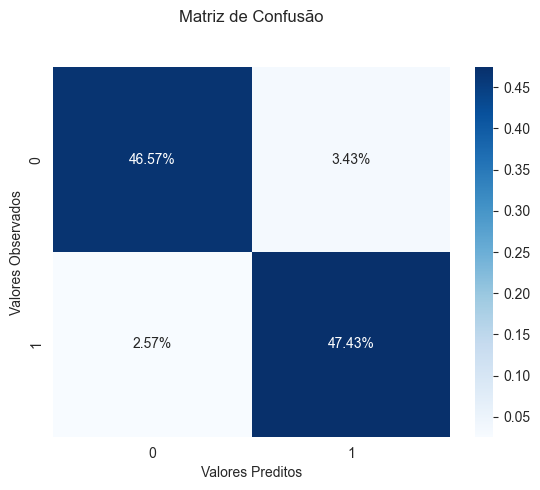

In [60]:
# Gerando a matriz de confusão e o mapa de calor
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [61]:
# Calculando as métricas com o classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



## Atividade 8: Crie a curva ROC para este modelo.

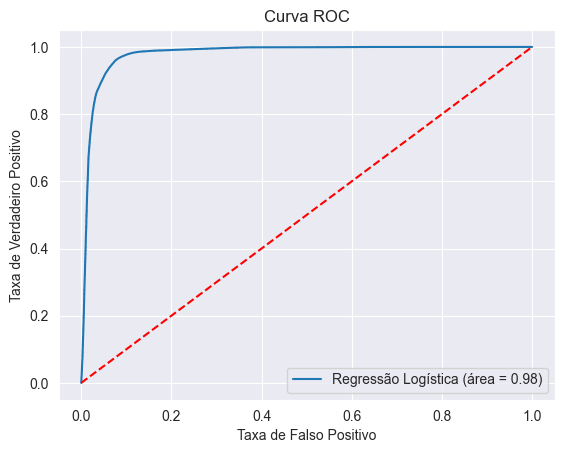

In [62]:
# Gerando o gráfico da curva ROC
logit_roc_auc = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [63]:
# Armazenando valores das variáveis X
X_new = pd.DataFrame({'const': 1, 'dist_casa': 82, 'dist_ultima_transacao': 13,
                      'razao_preco_medio': 14, 'loja_repetida': 1, 'usou_chip': 0,
                      'usou_pin': 0, 'online': 1}, index=[0])


In [64]:
# Gerando a previsão
y_pred_new = model.predict(X_new)

if y_pred_new[0] > 0.5:
    print("Transação fraudulenta")
else:
    print("Transação não fraudulenta")

Transação fraudulenta


## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [65]:
# Criando novo dataframe
df_unbalanced = df_original.copy()

In [66]:
# renomeando as colunas
df_unbalanced.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

In [67]:
# Definindo variáveis X e y
X_unbalanced = df_unbalanced.drop('fraude', axis=1)
y_unbalanced = df_unbalanced['fraude']

In [68]:
# Adicionando a constante ao dataframe
X_unbalanced = sm.add_constant(X_unbalanced)
print(X_unbalanced)

        const  dist_casa  dist_ultima_transacao  razao_preco_medio  \
0         1.0  57.877857               0.311140           1.945940   
1         1.0  10.829943               0.175592           1.294219   
2         1.0   5.091079               0.805153           0.427715   
3         1.0   2.247564               5.600044           0.362663   
4         1.0  44.190936               0.566486           2.222767   
...       ...        ...                    ...                ...   
999995    1.0   2.207101               0.112651           1.626798   
999996    1.0  19.872726               2.683904           2.778303   
999997    1.0   2.914857               1.472687           0.218075   
999998    1.0   4.258729               0.242023           0.475822   
999999    1.0  58.108125               0.318110           0.386920   

        loja_repetida  usou_chip  usou_pin  online  
0                 1.0        1.0       0.0     0.0  
1                 1.0        0.0       0.0     0.0  


In [69]:
# Criando o modelo
model_unbalanced = sm.Logit(y_unbalanced, X_unbalanced).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12


In [70]:
# Visualizando o sumário do modelo
print(model_unbalanced.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.5423
Time:                        12:35:03   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.3611      0.044   -237.200      0.000     -10.447     -10.275
dist_casa                 0.0152   8.32e-05    182.831      0.000       0.015       0.015
dist_ult

In [71]:
# Convertendo os parâmetros em percentuais
coef_unbalanced = model_unbalanced.params
print(((np.exp(coef_unbalanced)-1)*100).round(2))

const                     -100.00
dist_casa                    1.53
dist_ultima_transacao        2.56
razao_preco_medio          136.85
loja_repetida              -46.28
usou_chip                  -64.97
usou_pin                  -100.00
online                   77285.06
dtype: float64


In [72]:
# Aplicando o modelo para prever os valores de y
y_pred_unbalanced = model_unbalanced.predict(X_unbalanced)
print(y_pred_unbalanced)

0         0.000078
1         0.000061
2         0.020542
3         0.007451
4         0.058587
            ...   
999995    0.000025
999996    0.000095
999997    0.005996
999998    0.020837
999999    0.015454
Length: 1000000, dtype: float64


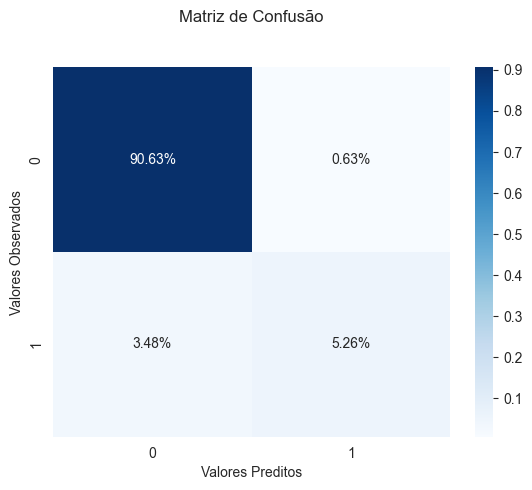

In [73]:
# Gerando a matriz de confusão e o mapa de calor
y_pred_unbalanced = y_pred_unbalanced.apply(lambda x: 1 if x > 0.5 else 0)
cm_unbalanced = confusion_matrix(y_unbalanced, y_pred_unbalanced)
sns.heatmap(cm_unbalanced/np.sum(cm_unbalanced), annot=True, cmap='Blues', fmt='.2%')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [74]:
# Calculando as métricas com o classification_report
print(classification_report(y_unbalanced, y_pred_unbalanced))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.89      0.60      0.72     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.80      0.85   1000000
weighted avg       0.96      0.96      0.96   1000000



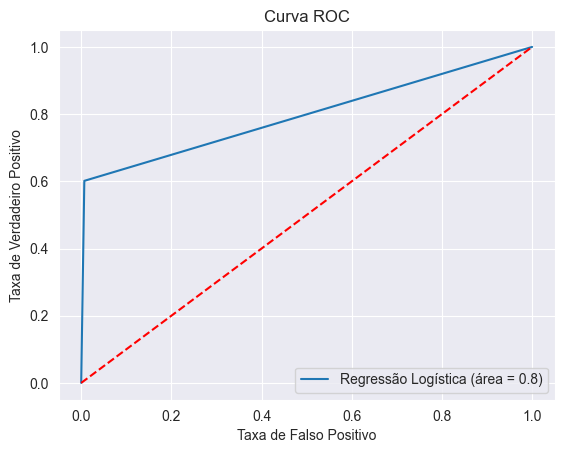

In [75]:
# Gerando o gráfico da curva ROC
logit_roc_auc_unbalanced = roc_auc_score(y_unbalanced, y_pred_unbalanced)
fpr_unbalanced, tpr_unbalanced, thresholds_unbalanced = roc_curve(y_unbalanced, y_pred_unbalanced)
plt.plot(fpr_unbalanced, tpr_unbalanced, label=f'Regressão Logística (área = {round(logit_roc_auc_unbalanced, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

In [76]:
# Gerando previsão com o modelo desbalanceado
y_pred_unbalanced_new = model_unbalanced.predict(X_new)

if y_pred_unbalanced_new[0] > 0.5:
    print("Transação fraudulenta")
else:
    print("Transação não fraudulenta")

Transação fraudulenta
